# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Import Data

The first step of data preparation is import data. We use `pandas` to import data while handling data types and missing values.

In [2]:
bank_mkt = pd.read_csv("../data/BankMarketing.csv",
                       na_values=["unknown", "nonexistent"],
                       true_values=["yes", "success"],
                       false_values=["no", "failure"])

In [3]:
# Treat pdays = 999 as missing values
bank_mkt["pdays"] = bank_mkt["pdays"].replace(999, np.nan)

In [4]:
# Convert types, "Int64" is nullable integer data type in pandas
bank_mkt = bank_mkt.astype(dtype={"age": "Int64",
                                  "job": "category",
                                  "marital": "category",
                                  "education": "category",
                                  "default": "boolean",
                                  "housing": "boolean",
                                  "loan": "boolean",
                                  "contact": "category",
                                  "month": "category",
                                  "day_of_week": "category",
                                  "duration": "Int64",
                                  "campaign": "Int64",
                                  "pdays": "Int64",
                                  "previous": "Int64",
                                  "poutcome": "boolean",
                                  "y": "boolean"})

## Exploratory Data Analysis

The dataset is imbalanced.

In [5]:
bank_mkt.y.value_counts()

False    36548
True      4640
Name: y, dtype: Int64

We can inspect which column has missing values.

In [6]:
bank_mkt.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

Most missing values are categorical data. We can simply drop the features with missing value, drop client data with missing value or fill the missing value with a ramdom value or use ramdom forest or naive bayes for imputation. However, it can be tricky and requires consideration. For example, people with certain marital status may leave the questionare filed empty on purpose.

Let's inspect each categorical data first.

In [7]:
# seperate data into different categories, "duration" is excluded
client_basic = bank_mkt[["age", "job", "marital", "education", "default", "housing", "loan", "y"]]
client_contact = bank_mkt[["contact", "month", "day_of_week", "y"]]
client_other = bank_mkt[["campaign", "pdays", "previous", "poutcome", "y"]]
context = bank_mkt[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]]

In [8]:
def explore_basic(client_basic, feature):
    dataframe = client_basic.copy()
    if pd.api.types.is_categorical_dtype(client_basic[feature]):
        dataframe[feature] = dataframe[feature].cat.add_categories('unknown')
        dataframe[feature] = dataframe[feature].fillna("unknown")
    groups = dataframe.groupby(by=feature, dropna=False).mean()
    return groups

In [9]:
explore_basic(client_basic, "job")

,age,default,housing,loan,y
job,,,,,
admin.,38.187296,0.000000,0.545267,0.167729,0.129726
blue-collar,39.555760,0.000000,0.522521,0.151542,0.068943
entrepreneur,41.723214,0.000000,0.548592,0.145070,0.085165
housemaid,45.500000,0.000000,0.523763,0.149370,0.100000
management,42.362859,0.000000,0.522257,0.153873,0.112175
retired,62.027326,0.000000,0.532220,0.143198,0.252326
self-employed,39.949331,0.000000,0.535844,0.141202,0.104856
services,37.926430,0.000000,0.529990,0.155377,0.081381
student,25.894857,0.000000,0.552817,0.166667,0.314286


People with missing marital values have higher likelihood to subscribe the term depost than people with marital values. In fact, it is even more likely than any other groups.

In [10]:
explore_basic(client_basic, "marital")

,age,default,housing,loan,y
marital,,,,,
divorced,44.899393,0.000000,0.534179,0.150301,0.103209
married,42.307165,0.000161,0.532087,0.155012,0.101573
single,33.158714,0.000000,0.548459,0.158398,0.140041
unknown,40.275000,0.000000,0.443038,0.151899,0.150000


Missing values in `education` also have similiar results.

In [11]:
explore_basic(client_basic, "education")

,age,default,housing,loan,y
education,,,,,
basic.4y,47.596504,0.000000,0.518354,0.153732,0.102490
basic.6y,40.448953,0.000000,0.520609,0.147849,0.082024
basic.9y,39.061208,0.000000,0.534611,0.149813,0.078246
high.school,37.998213,0.000127,0.530608,0.155245,0.108355
illiterate,48.500000,0.000000,0.555556,0.166667,0.222222
professional.course,40.080107,0.000451,0.554513,0.154943,0.113485
university.degree,38.879191,0.000000,0.546968,0.162308,0.137245
unknown,43.481225,0.000000,0.517445,0.143111,0.145003


In [12]:
explore_basic(client_basic, "default")

,age,housing,loan,y
default,,,,
False,39.140635,0.540801,0.156355,0.12879
True,42.333333,0.333333,0.000000,0.00000
NaN,43.371990,0.521386,0.151971,0.05153


In [13]:
explore_basic(client_basic, "housing")

,age,default,loan,y
housing,,,,
False,40.044195,0.000137,0.137311,0.108796
True,40.010011,0.000058,0.171070,0.116194
NaN,39.951515,0.000000,NaN,0.108081


In [14]:
explore_basic(client_basic, "loan")

,age,default,housing,y
loan,,,,
False,40.058822,0.000112,0.526804,0.113402
True,39.846671,0.000000,0.590749,0.109315
NaN,39.951515,0.000000,NaN,0.108081


We can also explore whether or not contact methods, month or day has impacts on the outcome.

In [15]:
client_contact

,contact,month,day_of_week,y
0,telephone,may,mon,False
1,telephone,may,mon,False
2,telephone,may,mon,False
3,telephone,may,mon,False
4,telephone,may,mon,False
...,...,...,...,...
41183,cellular,nov,fri,True
41184,cellular,nov,fri,False
41185,cellular,nov,fri,False
41186,cellular,nov,fri,True


In [16]:
def explore_contact(client_contact, feature):
    return client_contact.groupby(by=feature, dropna=False).mean()

We can see contact from `cellular` has higher chance of successful out come.

In [17]:
explore_contact(client_contact, "contact")

,y
contact,
cellular,0.147376
telephone,0.052313


Several months, such as March, April, October and Decemeber, have higher success rate.

In [18]:
explore_contact(client_contact, "month")

,y
month,
apr,0.204787
aug,0.106021
dec,0.489011
jul,0.090466
jun,0.105115
mar,0.505495
may,0.064347
nov,0.101439
oct,0.438719


Day of week has little impact on outcome.

In [19]:
explore_contact(client_contact, "day_of_week")

,y
day_of_week,
fri,0.108087
mon,0.099483
thu,0.121188
tue,0.117800
wed,0.116671


In [20]:
client_other

,campaign,pdays,previous,poutcome,y
0,1,<NA>,0,<NA>,False
1,1,<NA>,0,<NA>,False
2,1,<NA>,0,<NA>,False
3,1,<NA>,0,<NA>,False
4,1,<NA>,0,<NA>,False
...,...,...,...,...,...
41183,1,<NA>,0,<NA>,True
41184,1,<NA>,0,<NA>,False
41185,2,<NA>,0,<NA>,False
41186,1,<NA>,0,<NA>,True


`pdays` and `poutcome` are interesting. If `pdays` is missing value (999), that means that the client was not previously contacted and therefore should not have `poutcome`. But `poutcome` column has less missing values than `pdays`. We can print out the rows where the client is not contacted but have `poutcome`.

In [21]:
client_other[client_other["pdays"].isna() & client_other["poutcome"].notna()]

,campaign,pdays,previous,poutcome,y
24013,1,<NA>,1,False,False
24019,1,<NA>,1,False,True
24076,1,<NA>,1,False,False
24102,1,<NA>,1,False,True
24113,1,<NA>,1,False,False
...,...,...,...,...,...
41166,1,<NA>,1,False,True
41170,2,<NA>,4,False,False
41173,1,<NA>,2,False,True
41175,1,<NA>,2,False,False


In [22]:
client_other[client_other["pdays"].isna() & client_other["poutcome"].isna()]

,campaign,pdays,previous,poutcome,y
0,1,<NA>,0,<NA>,False
1,1,<NA>,0,<NA>,False
2,1,<NA>,0,<NA>,False
3,1,<NA>,0,<NA>,False
4,1,<NA>,0,<NA>,False
...,...,...,...,...,...
41181,1,<NA>,0,<NA>,True
41183,1,<NA>,0,<NA>,True
41184,1,<NA>,0,<NA>,False
41185,2,<NA>,0,<NA>,False


We can see for client with no previous contact, all of them have false outcome but have several previous contacts. We have several possiblities to treat this abnormal data:
- `poutcome` and `previous` are wrong and should be treated as missing value.
- `pdays` is wrong and should be replaced by the mean value.
- `pdays` is wrong and should be replaced by a very large value.
-  create a new feature to accomadate this kind of client.

To demostrate the last proposal, we can also create a new column called `ptype` with the following rules:
- clients with `pdays`, `previous` and `poutcome` are regarded as `previous` clients.
- clients with `previous` and `poutcome` but not `pdays` are regarded as `lost` clients.
- clients with no `pdays` and `poutcome` should be treated as `new` clients.


## Handling Missing Values

For `marital` and `education`, missing values should be treated as a different category.

In [23]:
def fill_unknown(df, feature):
    df = df.copy()
    df[feature] = df[feature].cat.add_categories("unknown")
    df[feature] = df[feature].fillna("unknown")
    return df
bank_mkt = fill_unknown(bank_mkt, "marital")
bank_mkt = fill_unknown(bank_mkt, "education")
bank_mkt = fill_unknown(bank_mkt, "job") # Bug here

For other categorical features, ramdomly assign a label.

In [67]:
def fill_ramdom(df, feature):
    df = df.copy()
    df[feature] = df[feature].apply(lambda x: np.random.choice(df[feature].dropna().values) if pd.isna(x) else x)
    return df

In [67]:
bank_mkt = bank_mkt.loc[bank_mkt["default"].notna(), :]
bank_mkt = fill_ramdom(bank_mkt, "housing")
bank_mkt = fill_ramdom(bank_mkt, "loan")

In [68]:
bank_mkt.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
ptype             0
dtype: int64

## Feature Engineering

Create a new column called `ptype` with the following rules:
- clients with `pdays`, `previous` and `poutcome` are regarded as `previous` clients.
- clients with `previous` and `poutcome` but not `pdays` are regarded as `lost` clients.
- clients with no `pdays` and `poutcome` should be treated as `new` clients.

In [69]:
bank_mkt["ptype"] = pd.NA
bank_mkt.loc[bank_mkt["pdays"].isna() & bank_mkt["poutcome"].isna(), "ptype"] = "new"
bank_mkt.loc[bank_mkt["pdays"].isna() & bank_mkt["poutcome"].notna(), "ptype"] = "lost"
bank_mkt.loc[bank_mkt["pdays"].notna() & bank_mkt["poutcome"].notna(), "ptype"] = "previous"

In [70]:
bank_mkt["pdays"] = bank_mkt["pdays"].fillna(999)

In [71]:
bank_mkt["poutcome"] = bank_mkt["poutcome"].fillna(False)

## Pre-Processing Data

We need to scale `age`, `campaign`, `pdays`, `poutcome` to the `[0, 1]` range.

In [72]:
from sklearn import preprocessing

In [73]:
bank_mkt.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'ptype'],
      dtype='object')

In [74]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data = bank_mkt[["age", "campaign", "pdays", "poutcome", "emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m", "nr.employed"]] 
data = min_max_scaler.fit_transform(data)
bank_mkt[["age", "campaign", "pdays", "poutcome", "emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m", "nr.employed"]]  = data

## Encoding

In [75]:
bank_x = bank_mkt[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'previous', 'pdays', 'poutcome', 'ptype', "emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m", "nr.employed"]]
bank_y = bank_mkt["y"].astype(int)

In [76]:
bank_x = pd.get_dummies(bank_x)

## Baseline Benchmark

We then start building a baseline benchmark using most simple models and considering imbalanced classes.

In [91]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(bank_x, bank_y, test_size = 0.5)

In [92]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(class_weight='balanced')

In [93]:
from sklearn.model_selection import cross_val_score
accuracy_cv = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv = 10)
f1_cv = cross_val_score(tree_clf, X_train, Y_train, scoring='f1', cv = 10)

In [94]:
accuracy_cv

array([0.84708738, 0.83398058, 0.83106796, 0.84417476, 0.83535697,
       0.83389995, 0.83292861, 0.82855755, 0.83535697, 0.84604177])

In [95]:
f1_cv

array([0.32104121, 0.29166667, 0.32421875, 0.33954451, 0.33791749,
       0.31300813, 0.34951456, 0.30374753, 0.32806324, 0.31965443])

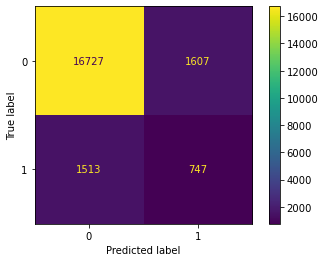

In [96]:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
tree_fit = tree_clf.fit(X_train, Y_train)
Y_test_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
plot_confusion_matrix(tree_clf, X_test, Y_test)

In [97]:
accuracy

0.8484995629795086

In [98]:
f1

0.3237971391417425

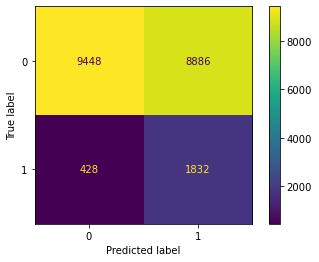

In [99]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_fit = nb_model.fit(X_train, Y_train)
Y_test_pred = nb_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
plot_confusion_matrix(nb_model, X_test, Y_test)

In [100]:
accuracy

0.5477323492279305

In [101]:
f1

0.28232393280936974

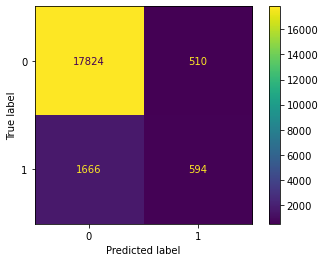

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf = rf_clf.fit(X_train, Y_train)
Y_test_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
plot_confusion_matrix(rf_clf, X_test, Y_test)

In [103]:
accuracy

0.8943381567446829

In [104]:
f1

0.3531510107015458